In [52]:
import os, glob
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [4]:
file_path='C:/Users/mourya/pred/dataset_blood_group'

In [5]:
name_class=os.listdir(file_path)

In [6]:
name_class

['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

In [7]:
filepaths=list(glob.glob(file_path+'/**/*',recursive=True))

In [84]:
os.path.split(filepaths[0])

('C:/Users/mourya/pred/dataset_blood_group', 'A+')

In [85]:
labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))

In [155]:
labels = [label for label in labels if label != 'dataset_blood_group']
# print(labels)

In [118]:
filepath=pd.Series(filepaths[8:],name='Filepath').astype(str)
labels=pd.Series(labels,name='Label')
data=pd.concat([filepath,labels],axis=1)
data=data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,C:/Users/mourya/pred/dataset_blood_group\A-\cl...,A-
1,C:/Users/mourya/pred/dataset_blood_group\AB-\c...,AB-
2,C:/Users/mourya/pred/dataset_blood_group\B-\cl...,B-
3,C:/Users/mourya/pred/dataset_blood_group\B-\cl...,B-
4,C:/Users/mourya/pred/dataset_blood_group\O-\cl...,O-


In [119]:
ct = 0
for i in range(len(data)):
    if data.iloc[i,0][-1] == '+' or data.iloc[i,0][-1] == '-':
        ct+=1
        print(data.iloc[i,:])
    else:
        dt = data.iloc[i,0]
        dta = data.iloc[i,1]
        dtl = dt.split('\\')
        if dtl[-2] != dta:
            print(data.iloc[i,:])
            ct+=1
print(ct)

0


In [111]:
data.iloc[1,1]

'AB+'

In [175]:
len(data)

6000

C:\Users\mourya\AppData\Local\Temp\ipykernel_6364\49797879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=Counts.index,y=Counts,palette=colors)


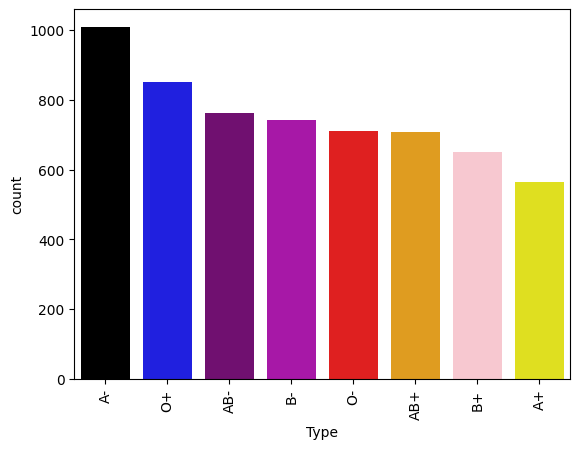

In [120]:
# Counts=data.Label.value_counts()
colors=['black','blue','purple','m','r','orange','pink','yellow']
sb.barplot(x=Counts.index,y=Counts,palette=colors)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [121]:
train,test=train_test_split(data,test_size=0.2,random_state=42)

In [122]:
len(train)

4800

In [123]:
train = train.dropna(subset=['Label'])
test = test.dropna(subset=['Label'])

In [183]:
len(y_test)

1197

In [15]:
import matplotlib.image as mpimg

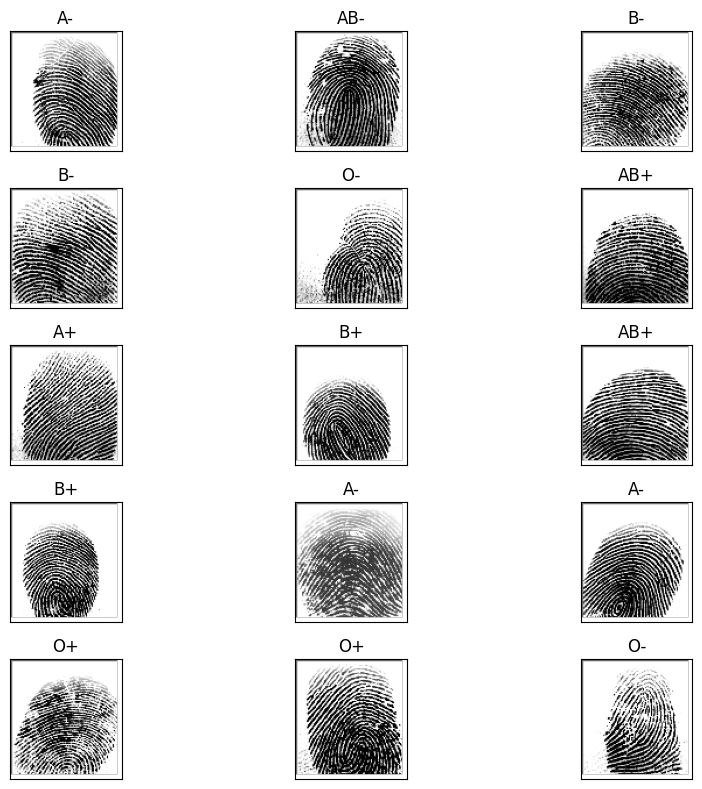

In [188]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(data['Filepath'][i])
    ax.imshow(img)
    ax.set_title(data['Label'][i])

plt.tight_layout()
plt.show()

In [126]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

pandas.core.series.Series

In [129]:
train['Label'] = train['Label'].astype(str)

In [205]:
train[:5]

,Filepath,Label
3897,C:/Users/mourya/pred/dataset_blood_group\O-\cl...,O-
5628,C:/Users/mourya/pred/dataset_blood_group\B-\cl...,B-
1756,C:/Users/mourya/pred/dataset_blood_group\O+\cl...,O+
2346,C:/Users/mourya/pred/dataset_blood_group\O-\cl...,O-
2996,C:/Users/mourya/pred/dataset_blood_group\A+\cl...,A+


In [134]:
train_gen=train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_node='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 4800 validated image filenames belonging to 8 classes.


In [20]:
test['Label'] = test['Label'].astype(str)

In [135]:
valid_gen=train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 1200 validated image filenames belonging to 8 classes.


In [136]:
test_gen=test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_node='categorical',
    batch_size=32,
    shuffle=False
)

Found 1200 validated image filenames belonging to 8 classes.


In [137]:
pretrained_model=ResNet50(
    input_shape=(256,256,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable=False

In [138]:
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)
outputs=Dense(8,activation='softmax')(x)
model=Model(inputs=inputs,outputs=outputs)

In [139]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [140]:
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                            min_delta=0,
                            patience=2,
                            mode='auto')]

In [141]:
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=3
)

Epoch 1/3


C:\Users\mourya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 933s 6s/step - accuracy: 0.4109 - loss: 1.5128 - val_accuracy: 0.6483 - val_loss: 0.8767
Epoch 2/3
150/150 ━━━━━━━━━━━━━━━━━━━━ 852s 6s/step - accuracy: 0.6813 - loss: 0.8269 - val_accuracy: 0.6883 - val_loss: 0.8190
Epoch 3/3
150/150 ━━━━━━━━━━━━━━━━━━━━ 871s 6s/step - accuracy: 0.7608 - loss: 0.6515 - val_accuracy: 0.7458 - val_loss: 0.6422


In [142]:
# Check the number of classes for train_gen and valid_gen
print(f"Number of classes in train_gen: {len(train_gen.class_indices)}")
print(f"Number of classes in valid_gen: {len(valid_gen.class_indices)}")

# Optionally, print the class mappings
print(f"Class indices (train_gen): {train_gen.class_indices}")
print(f"Class indices (valid_gen): {valid_gen.class_indices}")

Number of classes in train_gen: 8
Number of classes in valid_gen: 8
Class indices (train_gen): {'A+': 0, 'A-': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7}
Class indices (valid_gen): {'A+': 0, 'A-': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7}


In [143]:
model.save("model1_blood_group_detection.h5")

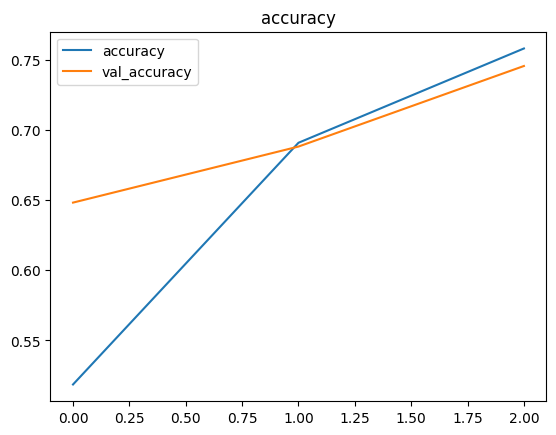

In [144]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("accuracy")
plt.show()

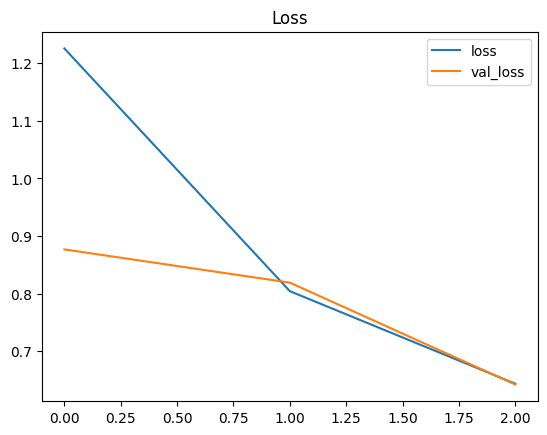

In [145]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [149]:
results=model.evaluate(test_gen,verbose=0)
print('Test Loss: ',format(results[0]))
print('Test Accuracy: ',format(results[1]*100))

Test Loss:  0.6421732902526855
Test Accuracy:  74.58333373069763


In [197]:
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

38/38 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step


In [195]:
# print("Predictions:", pred)
# print("Class Indices:", train_gen.class_indices)
print(len(pred),len(test['Label']))

1197 1200


list

In [162]:
test['Label'].head(5)

1782     O+
3917    AB-
221      O+
2135     A-
5224    AB+
Name: Label, dtype: object

In [198]:
# Truncate y_test to match pred's length
pred=pred[:len(y_test)]
# Generate the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

          A+       0.10      0.09      0.09       114
          A-       0.16      0.17      0.17       205
         AB+       0.15      0.22      0.18       138
         AB-       0.14      0.11      0.12       168
          B+       0.11      0.09      0.10       116
          B-       0.08      0.08      0.08       142
          O+       0.13      0.15      0.14       159
          O-       0.14      0.12      0.13       155

    accuracy                           0.13      1197
   macro avg       0.13      0.13      0.13      1197
weighted avg       0.13      0.13      0.13      1197



In [76]:
axes

array([[<Axes: title={'center': 'True: A-\nPredict: O+'}>,
        <Axes: title={'center': 'True: B-\nPredict: B-'}>],
       [<Axes: title={'center': 'True: AB-\nPredict: O-'}>,
        <Axes: title={'center': 'True: A+\nPredict: A+'}>],
       [<Axes: title={'center': 'True: O+\nPredict: AB-'}>,
        <Axes: title={'center': 'True: A-\nPredict: A-'}>],
       [<Axes: title={'center': 'True: AB+\nPredict: AB+'}>,
        <Axes: title={'center': 'True: A-\nPredict: A-'}>],
       [<Axes: title={'center': 'True: B+\nPredict: B+'}>,
        <Axes: title={'center': 'True: B-\nPredict: B-'}>]], dtype=object)

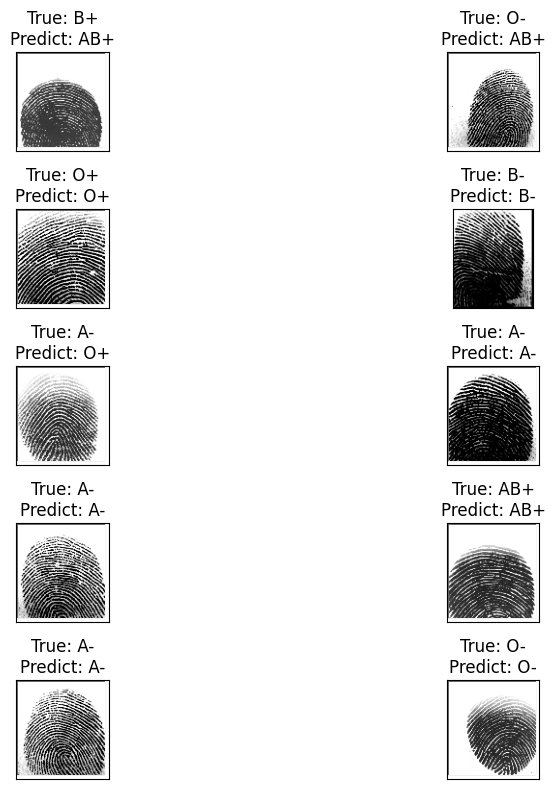

accuracy :  70


In [199]:
import random as rd
ct = 0
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(12,8),subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ind = rd.randint(1,100)
    ax.imshow(plt.imread(test.Filepath.iloc[ind]))
    ax.set_title(f'True: {test.Label.iloc[ind]}\nPredict: {pred[ind]}')
    if test.Label.iloc[ind] == pred[ind]:
        ct += 1


plt.tight_layout()
plt.show()
print("accuracy : ", ct *10)

In [242]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

# Load the image from the given path
img_path = 'C:/Users/mourya/pred/dataset_blood_group\\AB-\\cluster_5_130.BMP'

# Adjust the target size to 256x256 to match the model's expected input shape
img = image.load_img(img_path, target_size=(256, 256))

# Convert the image to a numpy array
x = image.img_to_array(img)

# Expand dimensions to match the expected input shape of the model (batch size, height, width, channels)
x = np.expand_dims(x, axis=0)

# Preprocess the image (normalize pixel values if necessary)
x = preprocess_input(x)

# Predict using the model
result = model.predict(x)
p=0
maxi=0
for i in range(0,8):
    if(result[0][i]>maxi):
        maxi=result[0][i]
        p=i
ans=['A+','A-','AB+','AB-','B+','B-','O+','O-']
print(ans[p])
print(result)
# Print the result as a percentage(result * 100).astype('int')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
AB-
[[0.00109934 0.16792928 0.07234381 0.5474032  0.06953868 0.06181463
  0.00857831 0.07129277]]
